# Bolivia

In [1]:
import pandas as pd, numpy as np, seaborn as sns, geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
gdf=gpd.read_file('indicadores_poblacion_censo2012\indicadores_poblacion_censo2012.geojson')
print(gdf.crs) #epsg:4326 usa grados. Neceistamos metros
gdf.head(2)

{'init': 'epsg:4326'}


,id,c_ut,DEPARTAMEN,PROVINCIA,MUNICIPIO,CAPITAL,pob_T_2001,Hombre2001,Mujer2001,pob_T_2012,Hombre2012,Mujer2012,TasaMigrac,TasaCensal,Ind_Mascul,geometry
0,0,040505,Oruro,Litoral,Esmeralda,Esmeralda,952,496,456,2702,1352,1350,-1.1,9.3,100.1,"MULTIPOLYGON (((-68.26703 -18.81616, -68.26279..."
1,1,050203,Potosí,Rafael Bustillo,Llallagua,Llallagua,36909,17895,19014,41104,19648,21456,-1.4,1.0,91.6,"MULTIPOLYGON (((-66.42997 -18.25647, -66.42895..."


Sacamos área. Como 'epsg:4326' usa grados, tendremos que cambiarle el crs.

In [3]:
gdf= gdf.to_crs({'init': 'epsg:3857'})
gdf["area"] = gdf['geometry'].area/ 10**6 #area en kilometros cuadrados
gdf['densidad']=gdf['pob_T_2012']/gdf['area']

In [4]:
def map_plot(data,columna,tamaño,titulo='plot', quantiles=True):
    tamaño = 12 * tamaño
    fig, eje = plt.subplots(figsize=(tamaño,tamaño))
    
    if quantiles:
        gdf.plot(column=columna,ax=eje, scheme='Quantiles', legend=True)
    else:
        gdf.plot(column=columna, ax=eje, legend=True)

    eje.set_title(titulo, fontsize=tamaño*2)
    plt.suptitle('Data de "https://geo.gob.bo/" (2012)', y=0.15)
    eje.set_axis_off()

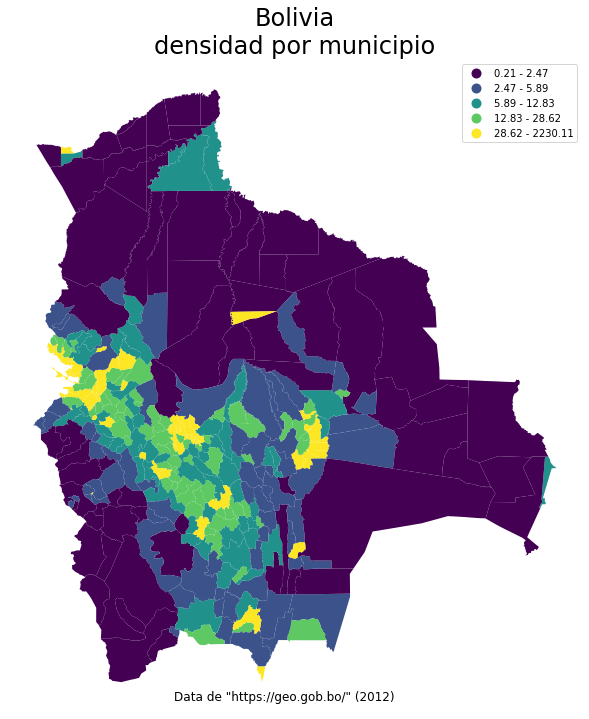

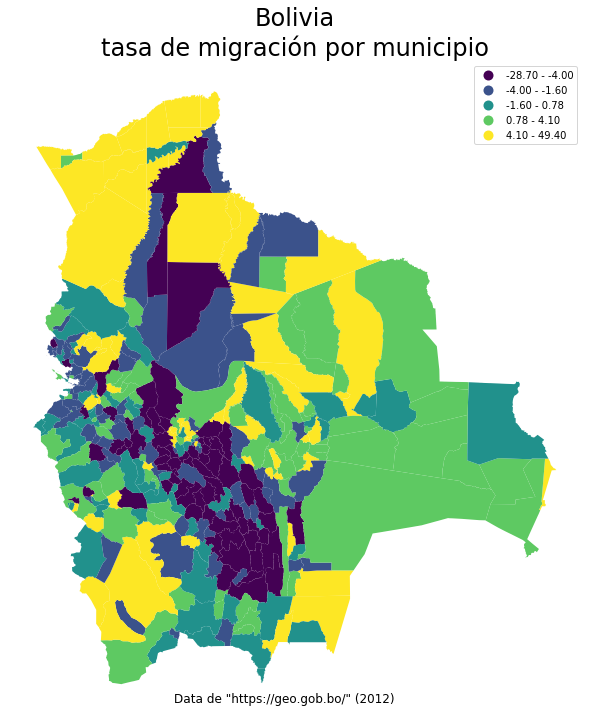

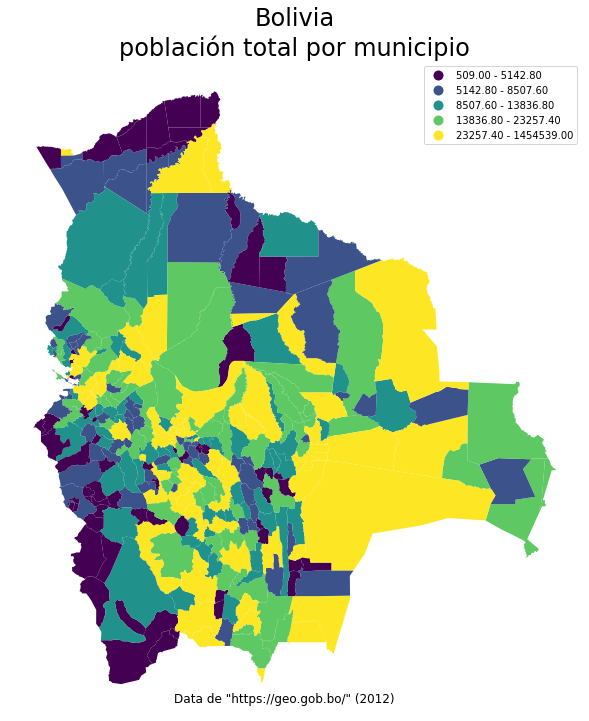

In [5]:
titulos=['densidad', 'tasa de migración', 'población total']
columnas=['densidad','TasaMigrac','pob_T_2012']

for t,c in zip(titulos,columnas):
    map_plot(data=gdf, columna=c,tamaño=1,
         titulo='Bolivia\n'+t+' por municipio', quantiles=True)
#     plt.savefig(r'visuales\bolivia_map_'+t+'.png')

In [13]:
# gdf.to_excel('bolivia_poblacion_municipio_mapa.xlsx', index=False)